In [1]:
import logging
import xml.etree.ElementTree as ET

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
filepath = '/Users/rory/data/strava/export_23193264/activities/1072662764.gpx'

def gpx_to_pandas(gps_file):
    root = ET.parse(gps_file).getroot()
    
    try:
        trkpts = list(root[1][2])
    except IndexError:
        pass
       
    try:
        trkpts = list(root[2][0])
    except IndexError:
        pass

    points = [
        {
            'lat': pt.get('lat'),
            'lon': pt.get('lon'),
            'timestamp': pt[1].text
        }
        for pt 
        in trkpts
    ]
    
    df = pd.DataFrame(points)
    return df

In [3]:
from pathlib import Path

In [4]:
p = Path('/Users/rory/data/strava/export_23193264/activities/')

In [5]:
len(list(p.glob('*.fit.gz')))

0

In [6]:
len(list(p.glob('*.gpx')))

273

In [29]:
gpx_to_pandas(str(list(p.glob('*.gpx'))[0])).head()

,lat,lon,timestamp
0,37.457013958,-122.179939757,0.000000
1,37.457035499,-122.179930286,2.083000
2,37.457220069,-122.179927603,2.586000
3,37.457291399,-122.180140420,2.665000
4,37.457303720,-122.180165985,2.663000


In [14]:
root = ET.parse(str(list(p.glob('*.gpx'))[0])).getroot()

In [26]:
list(root[2][0])

[<Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc50458>,
 <Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc50548>,
 <Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc50638>,
 <Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc50728>,
 <Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc50818>,
 <Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc50908>,
 <Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc509f8>,
 <Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc50ae8>,
 <Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc50bd8>,
 <Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc50cc8>,
 <Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc50db8>,
 <Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc50ea8>,
 <Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc50f98>,
 <Element '{http://www.topografix.com/GPX/1/0}trkpt' at 0x11cc570e8>,
 <Element '{http://w

In [ ]:
len()

In [12]:
str(list(p.glob('*.gpx'))[0])

'/Users/rory/data/strava/export_23193264/activities/1612870306.gpx'

In [30]:
df_list = [
    gpx_to_pandas(str(filepath))
    for filepath
    in p.glob('*.gpx')
]

In [31]:
df = pd.concat(df_list)
df.lat = df.lat.astype(float)
df.lon = df.lon.astype(float)

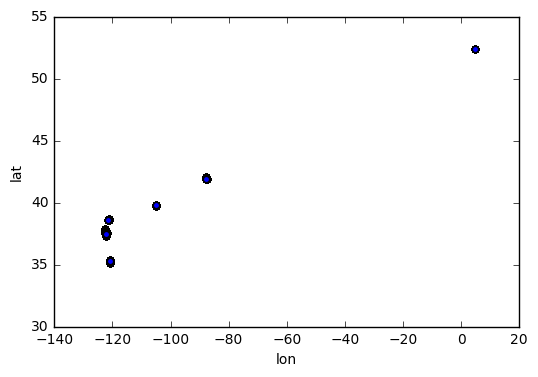

In [32]:
df.plot.scatter(x='lon', y='lat')

In [33]:
df.to_csv('/Users/rory/data/strava/all_activities.csv')